In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plot_helpers
from ast import literal_eval
from scipy.stats import pearsonr
from config import MAIN_DATA_PATH
import warnings
warnings.filterwarnings("ignore")

In the files, the data doesn't have an predefined header describing what data is in the different columns. Therefore, the column names need to be defined before loading the dataframe. We define them for the .tsv file of movie_metadata, and the .txt file of the plot_summaries. 

In [2]:
#List of column names/labels to be used while reading the files into the dataframes since the files do not contain any column labels

movie_metadata_column_names = ['Wikipedia_Movie_ID',
'Freebase_Movie_ID',
'Movie_Name',
'Movie_Release_Date',
'Movie_Box_Office_Revenue',
'Movie_Runtime',
'Movie_Languages',
'Movie_Countries',
'Movie_Genres']

plot_summaries_column_names = ['Wikipedia_Movie_ID',
'Movie_Plot_Summary']

We now specify converters to convert all dicts rendered as strings in the movie_metadata dataframe into dicts for easier analysis.

In [3]:
movie_metadata = pd.read_table(os.path.join(MAIN_DATA_PATH,"movie.metadata.tsv"), header = None, names = movie_metadata_column_names,converters = {'Movie_Languages':literal_eval, 'Movie_Countries':literal_eval, 'Movie_Genres':literal_eval})
display(movie_metadata)

,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_Name,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Languages,Movie_Countries,Movie_Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},{'/m/07s9rl0': 'Drama'}
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},{'/m/07s9rl0': 'Drama'}
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,{'/m/02h40lc': 'English Language'},"{'/m/03rt9': 'Ireland', '/m/07ssc': 'United Ki...","{'/m/03bxz7': 'Biographical film', '/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/06nbt': 'Satire', '/m/01z4y': 'Comedy'}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,{'/m/03_9r': 'Japanese Language'},{'/m/03_3d': 'Japan'},"{'/m/06n90': 'Science Fiction', '/m/0gw5n2f': ..."


In [4]:
movie_plot_summaries = pd.read_table(os.path.join(MAIN_DATA_PATH,"plot_summaries.txt"),header = None, names = plot_summaries_column_names)
display(movie_plot_summaries)

,Wikipedia_Movie_ID,Movie_Plot_Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


The column of 'Freebase_Movie_ID' won't be used in our analysis. Therefore, we delete it from the dataframe with help of the function .drop()

In [5]:
movie_metadata = movie_metadata.drop(columns = ['Freebase_Movie_ID'])
display(movie_metadata)

,Wikipedia_Movie_ID,Movie_Name,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Languages,Movie_Countries,Movie_Genres
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp..."
2,28463795,Brun bitter,1988,NaN,83.0,{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D..."
3,9363483,White Of The Eye,1987,NaN,110.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic..."
4,261236,A Woman in Flames,1983,NaN,106.0,{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},{'/m/07s9rl0': 'Drama'}
...,...,...,...,...,...,...,...,...
81736,35228177,Mermaids: The Body Found,2011-03-19,NaN,120.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},{'/m/07s9rl0': 'Drama'}
81737,34980460,Knuckle,2011-01-21,NaN,96.0,{'/m/02h40lc': 'English Language'},"{'/m/03rt9': 'Ireland', '/m/07ssc': 'United Ki...","{'/m/03bxz7': 'Biographical film', '/m/07s9rl0..."
81738,9971909,Another Nice Mess,1972-09-22,NaN,66.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/06nbt': 'Satire', '/m/01z4y': 'Comedy'}"
81739,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,{'/m/03_9r': 'Japanese Language'},{'/m/03_3d': 'Japan'},"{'/m/06n90': 'Science Fiction', '/m/0gw5n2f': ..."


Moving on, to get a deeper understanding of our data, we display the datatypes of both Datasets. A remarkable thing is for example, that the release date is in form of an object and not a datatime form. 

In [6]:
movie_metadata.dtypes

Wikipedia_Movie_ID            int64
Movie_Name                   object
Movie_Release_Date           object
Movie_Box_Office_Revenue    float64
Movie_Runtime               float64
Movie_Languages              object
Movie_Countries              object
Movie_Genres                 object
dtype: object

In [7]:
#Convert Release Dates to the DateTime format for easier analysis
movie_metadata = movie_metadata.assign(Movie_Release_Date = pd.to_datetime(movie_metadata['Movie_Release_Date'], format = 'mixed', errors = 'coerce'))
movie_metadata.dtypes
#Determine Release Year from the Release Date
movie_metadata = movie_metadata.assign(Movie_Release_Year = movie_metadata['Movie_Release_Date'].dt.year)
#Check the new datatypes to ensure that Release Date is now a Datetime object
movie_metadata.dtypes

Wikipedia_Movie_ID                   int64
Movie_Name                          object
Movie_Release_Date          datetime64[ns]
Movie_Box_Office_Revenue           float64
Movie_Runtime                      float64
Movie_Languages                     object
Movie_Countries                     object
Movie_Genres                        object
Movie_Release_Year                 float64
dtype: object

In [8]:
movie_plot_summaries.dtypes

Wikipedia_Movie_ID     int64
Movie_Plot_Summary    object
dtype: object

## Remove Duplicate Records

In order to affect a sound analysis of our data, we want to remove all the duplicates of films from our dataset. We look for and remove duplicates of the records based on all the attributes except the Wikipedia Movie ID since they serve as a unique identifier of movies in our dataframe.

In [9]:
#Check for and remove duplicate movie records
movie_metadata = movie_metadata[~movie_metadata.astype(str).duplicated(subset = ['Movie_Name','Movie_Release_Date','Movie_Box_Office_Revenue','Movie_Runtime','Movie_Languages','Movie_Countries','Movie_Genres'])]

In [10]:
display(movie_metadata)

,Wikipedia_Movie_ID,Movie_Name,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Languages,Movie_Countries,Movie_Genres,Movie_Release_Year
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",2001.0
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp...",2000.0
2,28463795,Brun bitter,1988-01-01,NaN,83.0,{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",1988.0
3,9363483,White Of The Eye,1987-01-01,NaN,110.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",1987.0
4,261236,A Woman in Flames,1983-01-01,NaN,106.0,{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},{'/m/07s9rl0': 'Drama'},1983.0
...,...,...,...,...,...,...,...,...,...
81736,35228177,Mermaids: The Body Found,2011-03-19,NaN,120.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},{'/m/07s9rl0': 'Drama'},2011.0
81737,34980460,Knuckle,2011-01-21,NaN,96.0,{'/m/02h40lc': 'English Language'},"{'/m/03rt9': 'Ireland', '/m/07ssc': 'United Ki...","{'/m/03bxz7': 'Biographical film', '/m/07s9rl0...",2011.0
81738,9971909,Another Nice Mess,1972-09-22,NaN,66.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/06nbt': 'Satire', '/m/01z4y': 'Comedy'}",1972.0
81739,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,{'/m/03_9r': 'Japanese Language'},{'/m/03_3d': 'Japan'},"{'/m/06n90': 'Science Fiction', '/m/0gw5n2f': ...",1992.0


## Check for Missing Values


From the previously displayed portions of the movies_metadata dataframe it becomes visible, that there are some values which are missing. We therefore want to check, the percentage of missing values that are exactly present so as to decide, what needs to be done about this. We do this for both of our main datasets.

In [11]:
#Display the percentages of missing values
(movie_metadata.isna().sum()/len(movie_metadata))*100

Wikipedia_Movie_ID           0.000000
Movie_Name                   0.000000
Movie_Release_Date           8.437125
Movie_Box_Office_Revenue    89.721536
Movie_Runtime               25.011623
Movie_Languages              0.000000
Movie_Countries              0.000000
Movie_Genres                 0.000000
Movie_Release_Year           8.437125
dtype: float64

In [12]:
#Display the percentages of missing values
(movie_plot_summaries.isna().sum()/len(movie_metadata))*100

Wikipedia_Movie_ID    0.0
Movie_Plot_Summary    0.0
dtype: float64

# Descriptive Statistics

On the numerical values of our dataset, we can conduct some first statistical analyses to get a better Idea of our data. Furthermore, to get a better feeling of our data, we'll make some first plots.

In [13]:
movie_metadata.describe()

,Wikipedia_Movie_ID,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Release_Year
count,8.173400e+04,74838,8.401000e+03,6.129100e+04,74838.000000
mean,1.740692e+07,1977-10-12 11:46:07.610037696,4.799363e+07,1.118192e+02,1977.489457
min,3.300000e+02,1888-01-01 00:00:00,1.000000e+04,0.000000e+00,1888.000000
25%,7.323566e+06,1956-01-01 00:00:00,2.083193e+06,8.100000e+01,1956.000000
50%,1.777709e+07,1985-05-18 12:00:00,1.063969e+07,9.300000e+01,1985.000000
75%,2.715081e+07,2004-01-01 00:00:00,4.071696e+07,1.060000e+02,2004.000000
max,3.750192e+07,2016-06-08 00:00:00,2.782275e+09,1.079281e+06,2016.000000
std,1.098763e+07,NaN,1.121753e+08,4.360070e+03,28.886039


One of our goals is to analyse what impacts the success of a film, and its box office revenue is an important part of this. We thus want to have a closer look into it. 

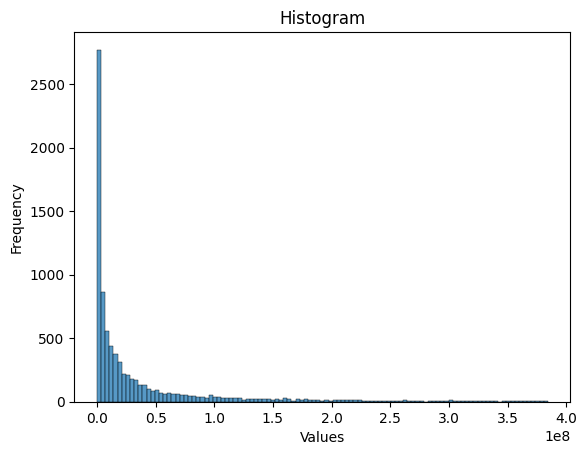

In [14]:
#Distribution of Movie Box Office Revenues (Linear Scale)
plot_helpers.histogram(x="Movie_Box_Office_Revenue", data=movie_metadata, remove_outliers=True,yscale='linear')

Using a linear scale for the y-axis, we can see that it resembles a heavy tailed distribution. Therefore, we will now try a log scale plot, which maybe more interpretable and allow us to clearly see the frequencies of the disproprotionately large values since it uses a scale ordered by magnitude.

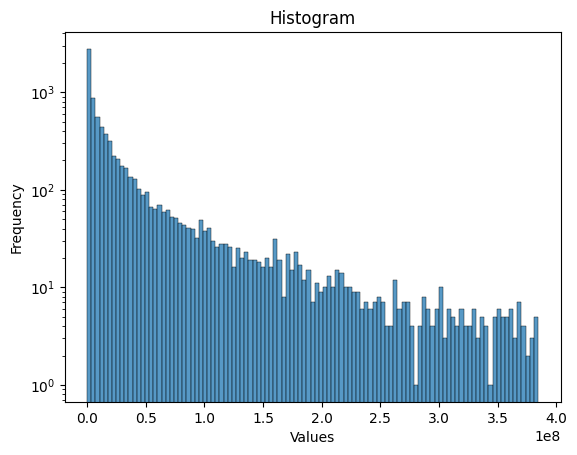

In [15]:
#Distribution of Movie Box Office Revenues
plot_helpers.histogram(x="Movie_Box_Office_Revenue", data=movie_metadata, remove_outliers=True,yscale='log')


We observe that there are a quite a lot of films with a low revenue and a substantially lesser number of films with a huge revenue. 

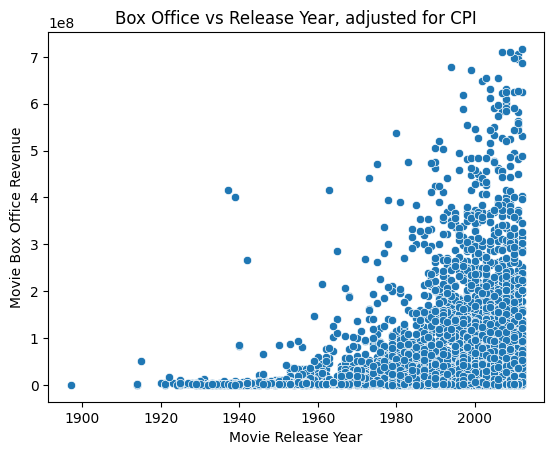

In [16]:
movies_with_box_office_revenue = movie_metadata[~movie_metadata['Movie_Box_Office_Revenue'].isna()]
movies_with_box_office_revenue = movies_with_box_office_revenue[movies_with_box_office_revenue['Movie_Release_Date'] == movies_with_box_office_revenue['Movie_Release_Date']]
plot_helpers.scatter(x="Movie_Release_Year",y="Movie_Box_Office_Revenue", data=movies_with_box_office_revenue,
                     xlabel="Movie Release Year", ylabel= "Movie Box Office Revenue",
                     title = "Box Office vs Release Year, adjusted for CPI", remove_outliers=True, threshold = 6)


It seems that Movie_Release_Year and Movie_Box_Office_Revenue are correlated! Let's find out exactly.

In [17]:
#Compute correlation coeff 
pearsonr(movies_with_box_office_revenue['Movie_Release_Year'],movies_with_box_office_revenue['Movie_Box_Office_Revenue'])

PearsonRResult(statistic=0.18552664538795255, pvalue=2.253003816364253e-65)

Since the p-value < 0.05, we can reject the null hypothesis of no correlation. Hence, the release year and box office revenue of movies is correlated. Our first thought is that this might be due to inflation. Let's find out whether we are correct or not!

## Inflation Adjustment of Box Office Revenues of Movies 

To remove this correlation from the dataset, we scrape the Consumer Price Index (CPI) for USD and keep the average per year. Thus, we can calculate an adjusted box office revenue for the movies based on their release year and the CPI of the last year available (base year) using the following formula:

$$ Adjusted \space Revenue = \frac{Movie \space Box \space Office \space Revenue}{CPI \space of \space movie \space release \space date}*CPI \space of \space baseyear $$

In [18]:
# Fetch historical CPI data for USD
cpi_url = 'https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/'
cpi_data = pd.read_html(cpi_url)[0]
cpi_data.columns = cpi_data.iloc[1]
cpi_data = cpi_data[2:-1] # Select data from 1913 to 2022
yearly_avg_cpi = cpi_data[['Year','Avg']]

# Check for missing values
yearly_avg_cpi.isna().sum()

1
Year    0
Avg     0
dtype: int64

In [19]:
yearly_avg_cpi = yearly_avg_cpi.astype(float)
yearly_avg_cpi = yearly_avg_cpi.rename(columns={"Year": "Year_cpi", "Avg": "Avg_cpi"})

Box_Office_Revenue_with_cpi = pd.merge(movies_with_box_office_revenue, yearly_avg_cpi, left_on='Movie_Release_Year', right_on='Year_cpi', how = 'left')
Box_Office_Revenue_with_cpi.drop('Year_cpi', axis=1, inplace=True)

base_year = 2022.0 # lastest value in CPI dataset

# Applying the necessary adjustment to revenues due to inflation
Box_Office_Revenue_with_cpi['Adjusted_Revenue'] = Box_Office_Revenue_with_cpi.apply(
    lambda row: row['Movie_Box_Office_Revenue'] / row['Avg_cpi'] * 
    yearly_avg_cpi[yearly_avg_cpi['Year_cpi'] == base_year]['Avg_cpi'].values[0],
    axis=1
)

display(Box_Office_Revenue_with_cpi)

,Wikipedia_Movie_ID,Movie_Name,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Languages,Movie_Countries,Movie_Genres,Movie_Release_Year,Avg_cpi,Adjusted_Revenue
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",2001.0,177.100,2.315268e+07
1,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/04t36': 'Musical', '/m/01z4y': 'Comedy', ...",1938.0,14.100,7.472043e+07
2,171005,Henry V,1989-11-08,10161099.0,137.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/04xvh5': 'Costume drama', '/m/082gq': 'Wa...",1989.0,124.000,2.398142e+07
3,77856,Mary Poppins,1964-08-27,102272727.0,139.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/0hj3myq': 'Children's/Family', '/m/04t36'...",1964.0,31.000,9.655040e+08
4,612710,New Rose Hotel,1999-10-01,21521.0,92.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",1999.0,166.600,3.780449e+04
...,...,...,...,...,...,...,...,...,...,...,...
8322,54540,Coming to America,1988-06-29,288752301.0,117.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/06cvj': 'Romantic comedy', '/m/03p5xs': '...",1988.0,118.300,7.143263e+08
8323,7761830,Spaced Invaders,1990-01-01,15369573.0,100.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/0hj3mt0': 'Alien Film', '/m/06n90': 'Scie...",1990.0,130.700,3.441456e+07
8324,1918494,State and Main,2000-08-26,6944471.0,106.0,"{'/m/02bjrlw': 'Italian Language', '/m/02h40lc...","{'/m/0f8l9c': 'France', '/m/09c7w0': 'United S...","{'/m/0gf28': 'Parody', '/m/09n5t_': 'Americana...",2000.0,172.200,1.180217e+07
8325,664006,Guilty as Sin,1993-06-04,22886222.0,107.0,{},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",1993.0,144.500,4.635133e+07


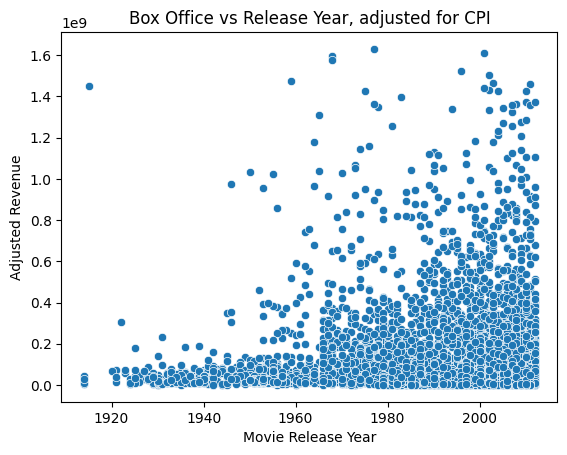

PearsonRResult(statistic=-0.007170348825115559, pvalue=0.5129942964782882)

In [20]:
Box_Office_Revenue_with_cpi = Box_Office_Revenue_with_cpi[~Box_Office_Revenue_with_cpi['Adjusted_Revenue'].isna()]
Box_Office_Revenue_with_cpi = Box_Office_Revenue_with_cpi[Box_Office_Revenue_with_cpi['Movie_Release_Date'] == Box_Office_Revenue_with_cpi['Movie_Release_Date']]

plot_helpers.scatter(x="Movie_Release_Year",y="Adjusted_Revenue", data=Box_Office_Revenue_with_cpi,
                     xlabel="Movie Release Year", ylabel= "Adjusted Revenue",
                     title = "Box Office vs Release Year, adjusted for CPI", remove_outliers=True, threshold = 6)

# Compute correlation coeff 
pearsonr(Box_Office_Revenue_with_cpi['Movie_Release_Year'],Box_Office_Revenue_with_cpi['Adjusted_Revenue'])

Since the p-value > 0.05, now, we can accept the null hypothesis of no correlation. Hence, the release year and box office revenue of movies are no longer correlated. Inflation adjustment works!

We now continue the rest of the analysis. Let's turn to analysing the languages, genres and countries of movies.

In [21]:
#Convert dicts to lists of values for easy analysis since IDs (dict keys) are not required

movie_metadata['Movie_Languages'] = movie_metadata['Movie_Languages'].apply(lambda x: list(x.values()))
movie_metadata['Movie_Countries'] = movie_metadata['Movie_Countries'].apply(lambda x: list(x.values()))
movie_metadata['Movie_Genres'] = movie_metadata['Movie_Genres'].apply(lambda x: list(x.values()))

display(movie_metadata)

,Wikipedia_Movie_ID,Movie_Name,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Languages,Movie_Countries,Movie_Genres,Movie_Release_Year
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000.0
2,28463795,Brun bitter,1988-01-01,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988.0
3,9363483,White Of The Eye,1987-01-01,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987.0
4,261236,A Woman in Flames,1983-01-01,NaN,106.0,[German Language],[Germany],[Drama],1983.0
...,...,...,...,...,...,...,...,...,...
81736,35228177,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama],2011.0
81737,34980460,Knuckle,2011-01-21,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011.0
81738,9971909,Another Nice Mess,1972-09-22,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]",1972.0
81739,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",1992.0


For these categories where we have the data present in lists, we want to first determine the number of movies in each cathegory. Therefore we create a function, which gets those counts. We apply this function to the three categories: 'Movie_Languages', 'Movie_Countries' and 'Movie_Genres'. Having determined the counts for all the categories, we display the results in the form of pie-chart.

In [22]:
def get_category_wise_counts(category_by_records_net):
    """
    count the number of movies in each category

    Parameters :
        -category_by_records_net (list) : list of the list of categories per movie
    
    """
    count_by_category_net = {}
    
    for record_categories in category_by_records_net:
        for category in record_categories:
            count_by_category_net[category] = count_by_category_net.get(category,0) + 1
            
    return count_by_category_net

In [23]:
count_by_language_net = get_category_wise_counts(list(movie_metadata['Movie_Languages']))
count_by_country_net = get_category_wise_counts(list(movie_metadata['Movie_Countries']))
count_by_genre_net = get_category_wise_counts(list(movie_metadata['Movie_Genres']))

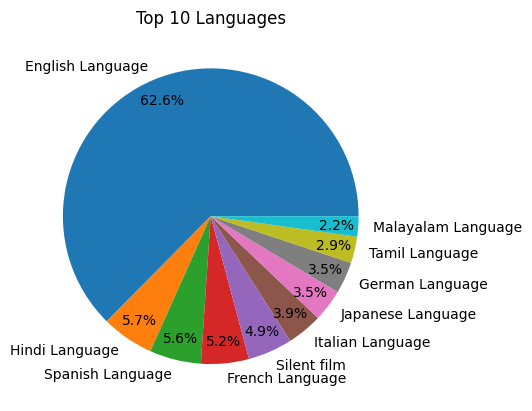

In [24]:
counts = np.array(list(count_by_language_net.values()))
languages = np.array(list(count_by_language_net.keys()))
idx_net_top10_languages_by_count = np.argsort(counts)[::-1][:10]
top10_languages = languages[idx_net_top10_languages_by_count]
counts_top10_languages = counts[idx_net_top10_languages_by_count]
plot_helpers.pie_chart(counts_top10_languages,labels=top10_languages,title='Top 10 Languages')

Languages: As expected, the English language is the major one (with the most movies) and makes for more than half of the the data. The rest of the languages, 'Hindi', 'Spanish', 'French', etc. are far more similar in abundance. 

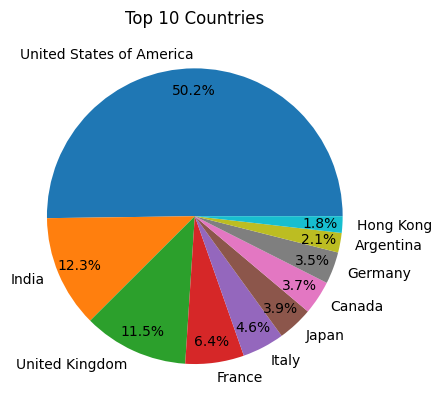

In [25]:
counts = np.array(list(count_by_country_net.values()))
countries = np.array(list(count_by_country_net.keys()))
idx_net_top10_countries_by_count = np.argsort(counts)[::-1][:10]
top10_countries = countries[idx_net_top10_countries_by_count]
counts_top10_countries = counts[idx_net_top10_countries_by_count]

plot_helpers.pie_chart(counts_top10_countries,labels=top10_countries,title='Top 10 Countries')

Countries: As could be expected from our results of the languages, the United States of America is producing the most films, followed by India and the United Kingdom. 

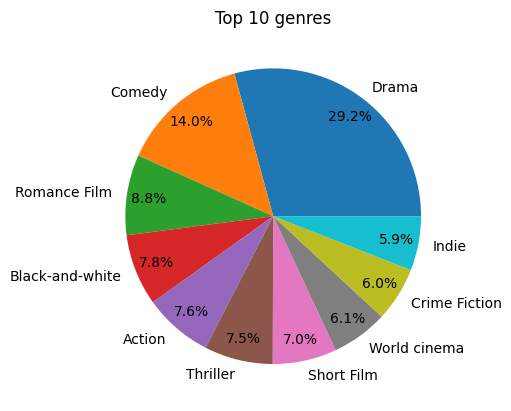

In [26]:
counts = np.array(list(count_by_genre_net.values()))
genres = np.array(list(count_by_genre_net.keys()))
idx_net_top10_genres_by_count = np.argsort(counts)[::-1][:10]
top10_genres = genres[idx_net_top10_genres_by_count]
counts_top10_genres = counts[idx_net_top10_genres_by_count]

plot_helpers.pie_chart(counts_top10_genres,labels=top10_genres,title='Top 10 genres')


The top Genres of films are Drama, Comedy and Romance and are more equally represented than the languages and countries. It would be interesting to see which countries are producing which kinds of films majorly. This is what we'll do now.

In order to be able to compare the Movies according to countries, genres and languages, we need to split up the lists we have in those columns and then sort them according to the different countries, genres, languages. So we split the lists with help of explode() and take the top 10 langagues / countries / genres. With help of those new datasets, we analyse in different plots, how the revenue and runtime vary in the movies in the top 10 languages / countries / genres.

In [27]:
df_languages=movie_metadata.explode("Movie_Languages").drop(columns=["Movie_Countries","Movie_Genres"]).reset_index(drop=True)
df_countries=movie_metadata.explode("Movie_Countries").drop(columns=["Movie_Languages","Movie_Genres"]).reset_index(drop=True)
df_genres=movie_metadata.explode("Movie_Genres").drop(columns=["Movie_Languages","Movie_Countries"]).reset_index(drop=True)

df_languages_top10=df_languages[df_languages["Movie_Languages"].isin(top10_languages)]
df_countries_top10=df_countries[df_countries["Movie_Countries"].isin(top10_countries)]
df_genres_top10=df_genres[df_genres["Movie_Genres"].isin(top10_genres)]

df_languages_top3=df_languages[df_languages["Movie_Languages"].isin(top10_languages[:3])]
df_countries_top3=df_countries[df_countries["Movie_Countries"].isin(top10_countries[:3])]
df_genres_top3=df_genres[df_genres["Movie_Genres"].isin(top10_genres[:3])]

display(df_countries_top3)

,Wikipedia_Movie_ID,Movie_Name,Movie_Release_Date,Movie_Box_Office_Revenue,Movie_Runtime,Movie_Countries,Movie_Release_Year
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,United States of America,2001.0
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,United States of America,2000.0
3,9363483,White Of The Eye,1987-01-01,NaN,110.0,United Kingdom,1987.0
5,13696889,The Gangsters,1913-05-29,NaN,35.0,United States of America,1913.0
7,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,United States of America,1938.0
...,...,...,...,...,...,...,...
94574,31353375,The Luck of the Navy,1927-11-22,NaN,110.0,United Kingdom,1927.0
94577,23851782,The Ghost Train,1941-05-03,NaN,82.0,United Kingdom,1941.0
94580,35228177,Mermaids: The Body Found,2011-03-19,NaN,120.0,United States of America,2011.0
94582,34980460,Knuckle,2011-01-21,NaN,96.0,United Kingdom,2011.0


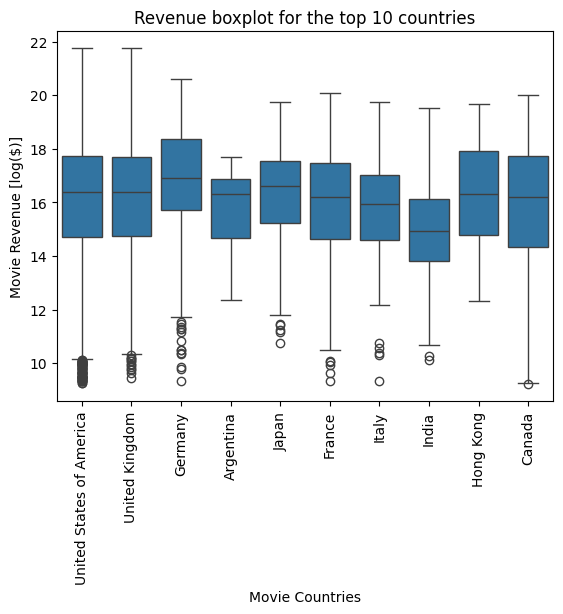

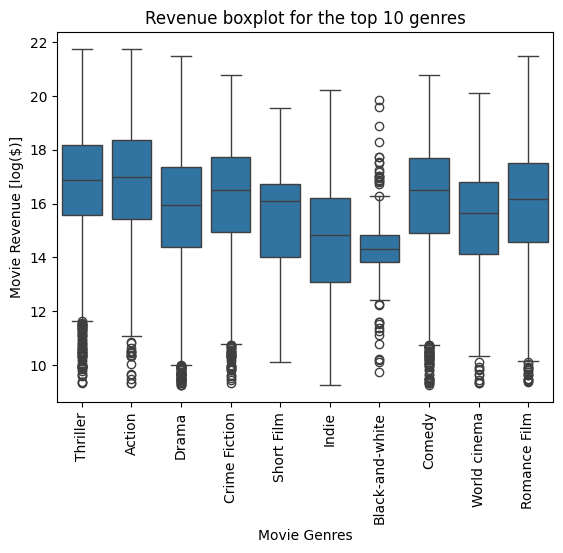

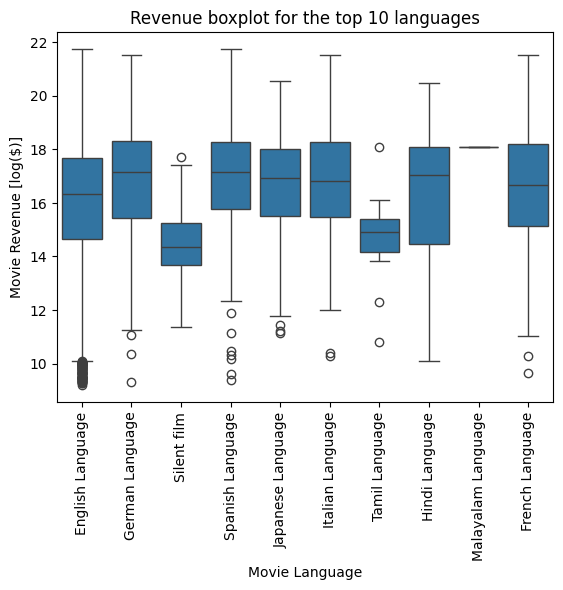

In [28]:
#Box Plots
plot_helpers.box(data=df_countries_top10, x="Movie_Countries", y="Movie_Box_Office_Revenue", log=True, xlabel="Movie Countries", ylabel= "Movie Revenue [log($)]", title = "Revenue boxplot for the top 10 countries")
plot_helpers.box(data=df_genres_top10, x="Movie_Genres", y="Movie_Box_Office_Revenue", log=True, xlabel="Movie Genres", ylabel= "Movie Revenue [log($)]", title = "Revenue boxplot for the top 10 genres")
plot_helpers.box(data=df_languages_top10, x="Movie_Languages", y="Movie_Box_Office_Revenue", log=True, xlabel="Movie Language", ylabel= "Movie Revenue [log($)]", title = "Revenue boxplot for the top 10 languages")


Having plotted all the three boxplots for revenue (using a log scale) of the movies in all the three categories (languages, countries, genres), we will now analyze them: 

Countries: The boxplots are quite overlapping. The tendency goes towards a lower revenue for films from India compared with a higher revenue for films from Germany.

Genres: Again, all the boxplots are overlapping. Still, films such as Black-and-White films seem to have a bit a less revenue than films in genres like comedy, action or thriller. 

Languages: We can observe that silent films and films in Tamil language make less revenue than films in languages such as German, French or Spanish. But it has to be said, that there are overlaps in all of the boxplots, because of which we can't draw a fixed conclusion. 

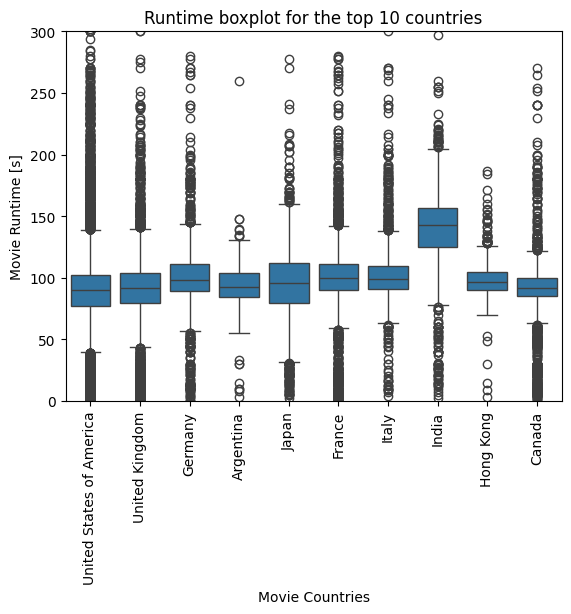

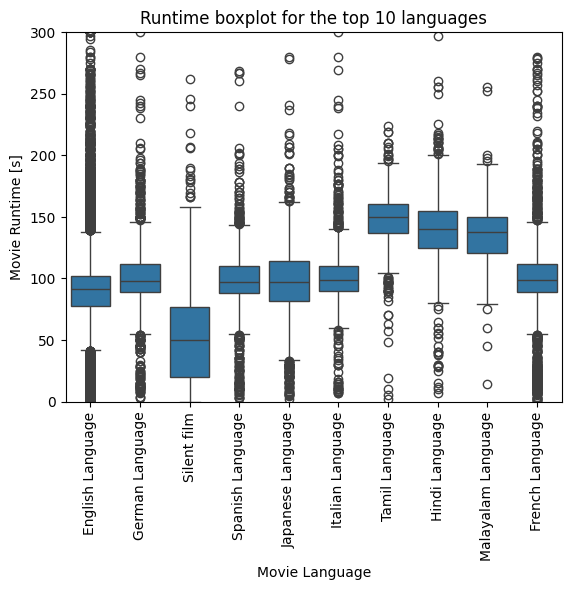

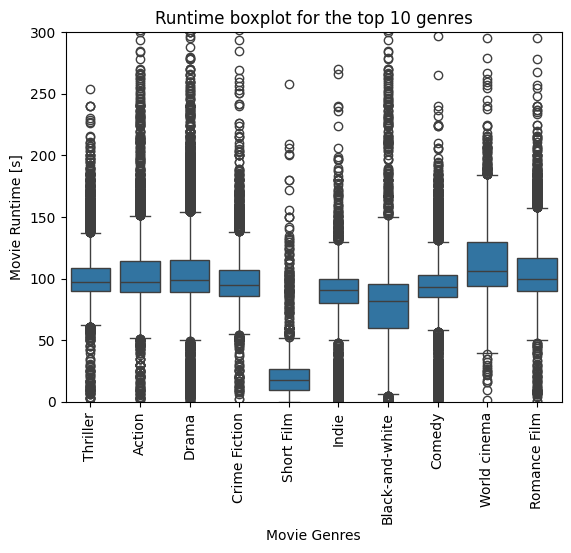

In [29]:
plot_helpers.box(data=df_countries_top10, x="Movie_Countries", y="Movie_Runtime", xlabel="Movie Countries", ylabel= "Movie Runtime [s]", title = "Runtime boxplot for the top 10 countries", ylim=(0,300))
plot_helpers.box(data=df_languages_top10, x="Movie_Languages", y="Movie_Runtime", ylim=(0,300), xlabel="Movie Language", ylabel= "Movie Runtime [s]", title = "Runtime boxplot for the top 10 languages")
plot_helpers.box(data=df_genres_top10, x="Movie_Genres", y="Movie_Runtime", ylim=(0,300), xlabel="Movie Genres", ylabel= "Movie Runtime [s]", title = "Runtime boxplot for the top 10 genres")

The same boxplots are done for the runtime of movies in the three categories. More differences can be observed now:

Countries: For the countries, an interesting observation is the longer runtime for Indian movies in comparision to the other countries. This fact is supported by the plot of the languages, wherein the Tamil and Hindi languages seem to have a longer runtime as compared to the other languages. 

Languages: Silent films tend to have a shorter runtime than most of the films. On the contrary, films in Tamil, Hindi and Malaysian languages seem to have a longer runtime.

Genres: As expected, short films have a significantly shorter runtime than all of the other genres. For the other Genres, there is no striking difference apart from the world cinema movies having runtimes which are a bit longer.

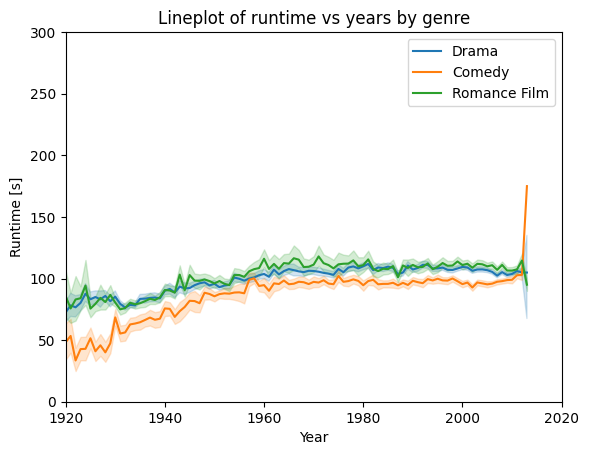

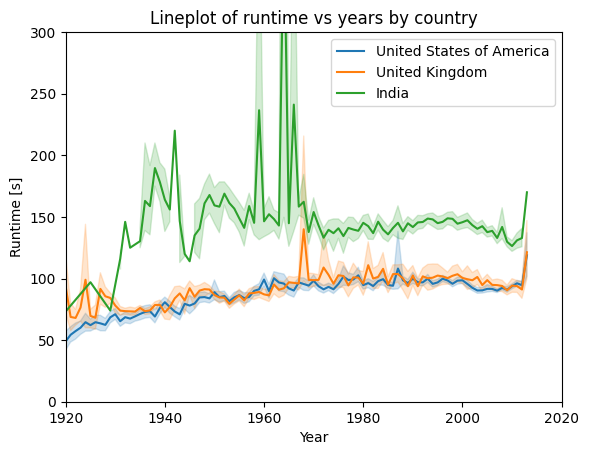

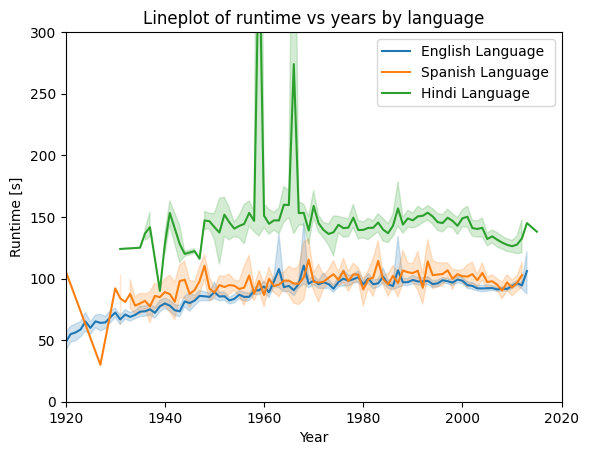

In [30]:
#Lineplots
plot_helpers.line(data=df_genres_top3, x="Movie_Release_Year", y="Movie_Runtime", hue="Movie_Genres", title="Lineplot of runtime vs years by genre", xlabel="Year", ylabel="Runtime [s]", xlim=(1920,2020),ylim=(0,300), remove_outliers=True)
plot_helpers.line(data=df_countries_top3, x="Movie_Release_Year", y="Movie_Runtime", hue="Movie_Countries", title="Lineplot of runtime vs years by country", xlabel="Year", ylabel="Runtime [s]",xlim=(1920,2020), ylim=(0,300), remove_outliers=True)
plot_helpers.line(data=df_languages_top3, x="Movie_Release_Year", y="Movie_Runtime", hue="Movie_Languages", title="Lineplot of runtime vs years by language", xlabel="Year", ylabel="Runtime [s]",xlim=(1920,2020), ylim=(0,300), remove_outliers=True)


We now show the lineplots with 95% confidence intervals (obtained using bootstrapping method) for further analysis. Here again, we focus on the top 3 categories.

Genre : The CIs are more or less overlapping, however, movies with the comedy genre seem to be a bit shorter than the other two.

Country : Runtime of movies from India are clearly longer. One should ignore data before 1940 because there is not enough data provided to calculate CI's for India. One should also ignore the peak in 1965, impacted by outliers. 

Language : Again, runtime of movies in the Hindi Language, i.e., from India are clearly longer.

It seems that changes in runtime over the years w.r.t. movies grouped by language and movies grouped by country are correlated.

## Spotify Dataset

As in our project, we want to analyze relations between movies and their music, one of the first things we need is good data about the music in different films. For that reason, we extracted fmusic data corresponding to the movies (from Spotify: see spotify_scraper.py for details of the scraping). 

This scraping process is still in progress because of rate limits imposed by Spotify's Web API! The dataset you find down here, is just a sample of what will be our final dataset! 

As the scraping process is still in progress, the analysis we were able to do on this data is limited. We just conducted a first analysis once to get a bit a better feeling of the data present in the dataset. We will discuss this now.

In [31]:
sample_movie_music_df = pd.read_csv(os.path.join(MAIN_DATA_PATH,"combined_spotify_all.csv"))
display(sample_movie_music_df)

,Wikipedia_Movie_ID,Movie_Name,Album_Name,Album_Release_Date,Album_Genres,Album_Popularity,Album_Total_Tracks,Track_Name,Track_Duration,Track_Acousticness,...,Track_Energy,Track_Instrumentalness,Track_Key,Track_Liveness,Track_Loudness,Track_Mode,Track_Speechiness,Track_Tempo,Track_Time_Signature,Track_Valence
0,11713955,Chiko,Chiriki da Chikotela (Original Motion Picture ...,1975-03-08,[],0,5,"Theme from ""Chiriki da Chikotela"" I",74690,0.754,...,0.4370,0.649,7,0.6290,-22.378,1,0.0566,127.457,4,0.8220
1,11713955,Chiko,Chiriki da Chikotela (Original Motion Picture ...,1975-03-08,[],0,5,"Theme from ""Chiriki da Chikotela"" II",70612,0.712,...,0.2490,0.958,7,0.4420,-21.193,0,0.0386,144.378,4,0.8430
2,11713955,Chiko,Chiriki da Chikotela (Original Motion Picture ...,1975-03-08,[],0,5,"Theme from ""Chiriki da Chikotela"" III",87718,0.993,...,0.0222,0.947,9,0.0939,-26.814,1,0.0474,51.295,4,0.4320
3,11713955,Chiko,Chiriki da Chikotela (Original Motion Picture ...,1975-03-08,[],0,5,"Theme from ""Chiriki da Chikotela"" IV",79467,0.982,...,0.0139,0.912,4,0.1450,-27.517,1,0.0431,59.938,4,0.0323
4,11713955,Chiko,Chiriki da Chikotela (Original Motion Picture ...,1975-03-08,[],0,5,"Theme from ""Chiriki da Chikotela"" V",101393,0.982,...,0.0122,0.933,7,0.0951,-28.517,1,0.0398,68.156,3,0.0368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36494,12404283,A Streetcar Named Desire,A Streetcar Named Desire (Original Motion Pict...,1951-10-01,[],12,10,Flores Para Los Muertos,289440,0.412,...,0.2110,0.920,2,0.0923,-18.385,0,0.0346,93.798,4,0.0724
36495,12404283,A Streetcar Named Desire,A Streetcar Named Desire (Original Motion Pict...,1951-10-01,[],12,10,Mania,116466,0.894,...,0.2260,0.961,9,0.0928,-18.870,0,0.0491,146.443,4,0.2910
36496,12404283,A Streetcar Named Desire,A Streetcar Named Desire (Original Motion Pict...,1951-10-01,[],12,10,Lust,198093,0.966,...,0.0431,0.939,2,0.0727,-22.916,1,0.0410,121.988,4,0.0987
36497,12404283,A Streetcar Named Desire,A Streetcar Named Desire (Original Motion Pict...,1951-10-01,[],12,10,Soliloquy,170906,0.901,...,0.1220,0.946,2,0.1370,-22.450,1,0.0372,84.589,1,0.0511


We now aggregate the music data across a movie album by averaging and/or taking a maximum as appliable for continuous or discrete values.

In [32]:
agg_dict = {'mean': ['Track_Duration',
    'Track_Acousticness',
    'Track_Danceability',
    'Track_Energy',
    'Track_Instrumentalness',
    'Track_Liveness',
    'Track_Loudness',
    'Track_Speechiness',
    'Track_Tempo',
    'Track_Valence'], 
    'max': ['Track_Key','Track_Mode','Track_Time_Signature']}
sample_movie_music_df_avg_by_movie = sample_movie_music_df.groupby('Wikipedia_Movie_ID').agg({col_label : func for func, col_label_net in agg_dict.items() for col_label in col_label_net})

In [33]:
sample_movie_music_df_avg_by_movie.reset_index()

,Wikipedia_Movie_ID,Track_Duration,Track_Acousticness,Track_Danceability,Track_Energy,Track_Instrumentalness,Track_Liveness,Track_Loudness,Track_Speechiness,Track_Tempo,Track_Valence,Track_Key,Track_Mode,Track_Time_Signature
0,4727,156936.238095,0.705810,0.217871,0.194508,0.765190,0.120100,-22.975571,0.041719,103.229429,0.093490,11,1,5
1,5729,360891.000000,0.503619,0.203157,0.154514,0.263757,0.194000,-21.413571,0.038871,102.375714,0.049314,9,1,4
2,7906,172321.312500,0.848187,0.525687,0.232009,0.000002,0.201744,-16.112125,0.136300,115.958875,0.448437,11,1,4
3,20669,135921.000000,0.725050,0.506400,0.313005,0.397254,0.186710,-13.866500,0.058335,119.669500,0.433505,10,1,5
4,30327,241701.588235,0.726965,0.245647,0.388721,0.887059,0.110982,-17.462941,0.058665,106.313412,0.100653,11,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,36534974,205166.130435,0.612183,0.164304,0.252252,0.838004,0.158757,-14.472174,0.036543,98.817826,0.067335,10,1,5
2767,36536162,144671.916667,0.896000,0.594583,0.723417,0.904500,0.132458,-7.367333,0.038917,121.409167,0.907000,10,1,4
2768,36582534,218970.214286,0.435171,0.499786,0.606786,0.000624,0.133664,-6.394357,0.065586,114.639857,0.617000,9,1,4
2769,37186779,103902.937500,0.812884,0.348781,0.222900,0.815333,0.101337,-16.255000,0.047613,106.709312,0.170531,11,1,5


In order to get a better idea of the nature of our dataset, we again conduct the very simple analysis of statistical description and identification of the null values in each cathegory. 

For the statistical analysis, we see that for the moment there are just 2771 values taken into account. This makes sense, as we haven't scraped all data yet. 

It can be seen that there are no NaN values present in our dataset. 

In [34]:
sample_movie_music_df_avg_by_movie.describe()

,Track_Duration,Track_Acousticness,Track_Danceability,Track_Energy,Track_Instrumentalness,Track_Liveness,Track_Loudness,Track_Speechiness,Track_Tempo,Track_Valence,Track_Key,Track_Mode,Track_Time_Signature
count,2.771000e+03,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000
mean,2.170576e+05,0.615552,0.458762,0.423923,0.374355,0.191595,-13.650867,0.076063,112.876533,0.423742,9.713822,0.980873,4.322988
std,1.104515e+05,0.263175,0.166242,0.222599,0.336542,0.089692,5.846637,0.061166,13.941378,0.255668,1.711087,0.136995,0.487358
min,3.358430e+04,0.000039,0.073800,0.013424,0.000000,0.044100,-37.230129,0.024100,68.094000,0.032323,0.000000,0.000000,1.000000
25%,1.527124e+05,0.420725,0.323526,0.233004,0.013476,0.130959,-17.863857,0.042726,103.329036,0.162302,9.000000,1.000000,4.000000
50%,2.049286e+05,0.668400,0.465450,0.408600,0.309956,0.165325,-12.392667,0.054293,112.190300,0.455900,10.000000,1.000000,4.000000
75%,2.664319e+05,0.836058,0.582550,0.598125,0.714369,0.223775,-9.109563,0.086136,121.157121,0.648056,11.000000,1.000000,5.000000
max,2.853440e+06,0.995000,0.856600,0.989143,0.963000,0.963000,0.874286,0.913417,198.799000,0.963000,11.000000,1.000000,5.000000


In [35]:
sample_movie_music_df_avg_by_movie.isnull().sum()

Track_Duration            0
Track_Acousticness        0
Track_Danceability        0
Track_Energy              0
Track_Instrumentalness    0
Track_Liveness            0
Track_Loudness            0
Track_Speechiness         0
Track_Tempo               0
Track_Valence             0
Track_Key                 0
Track_Mode                0
Track_Time_Signature      0
dtype: int64

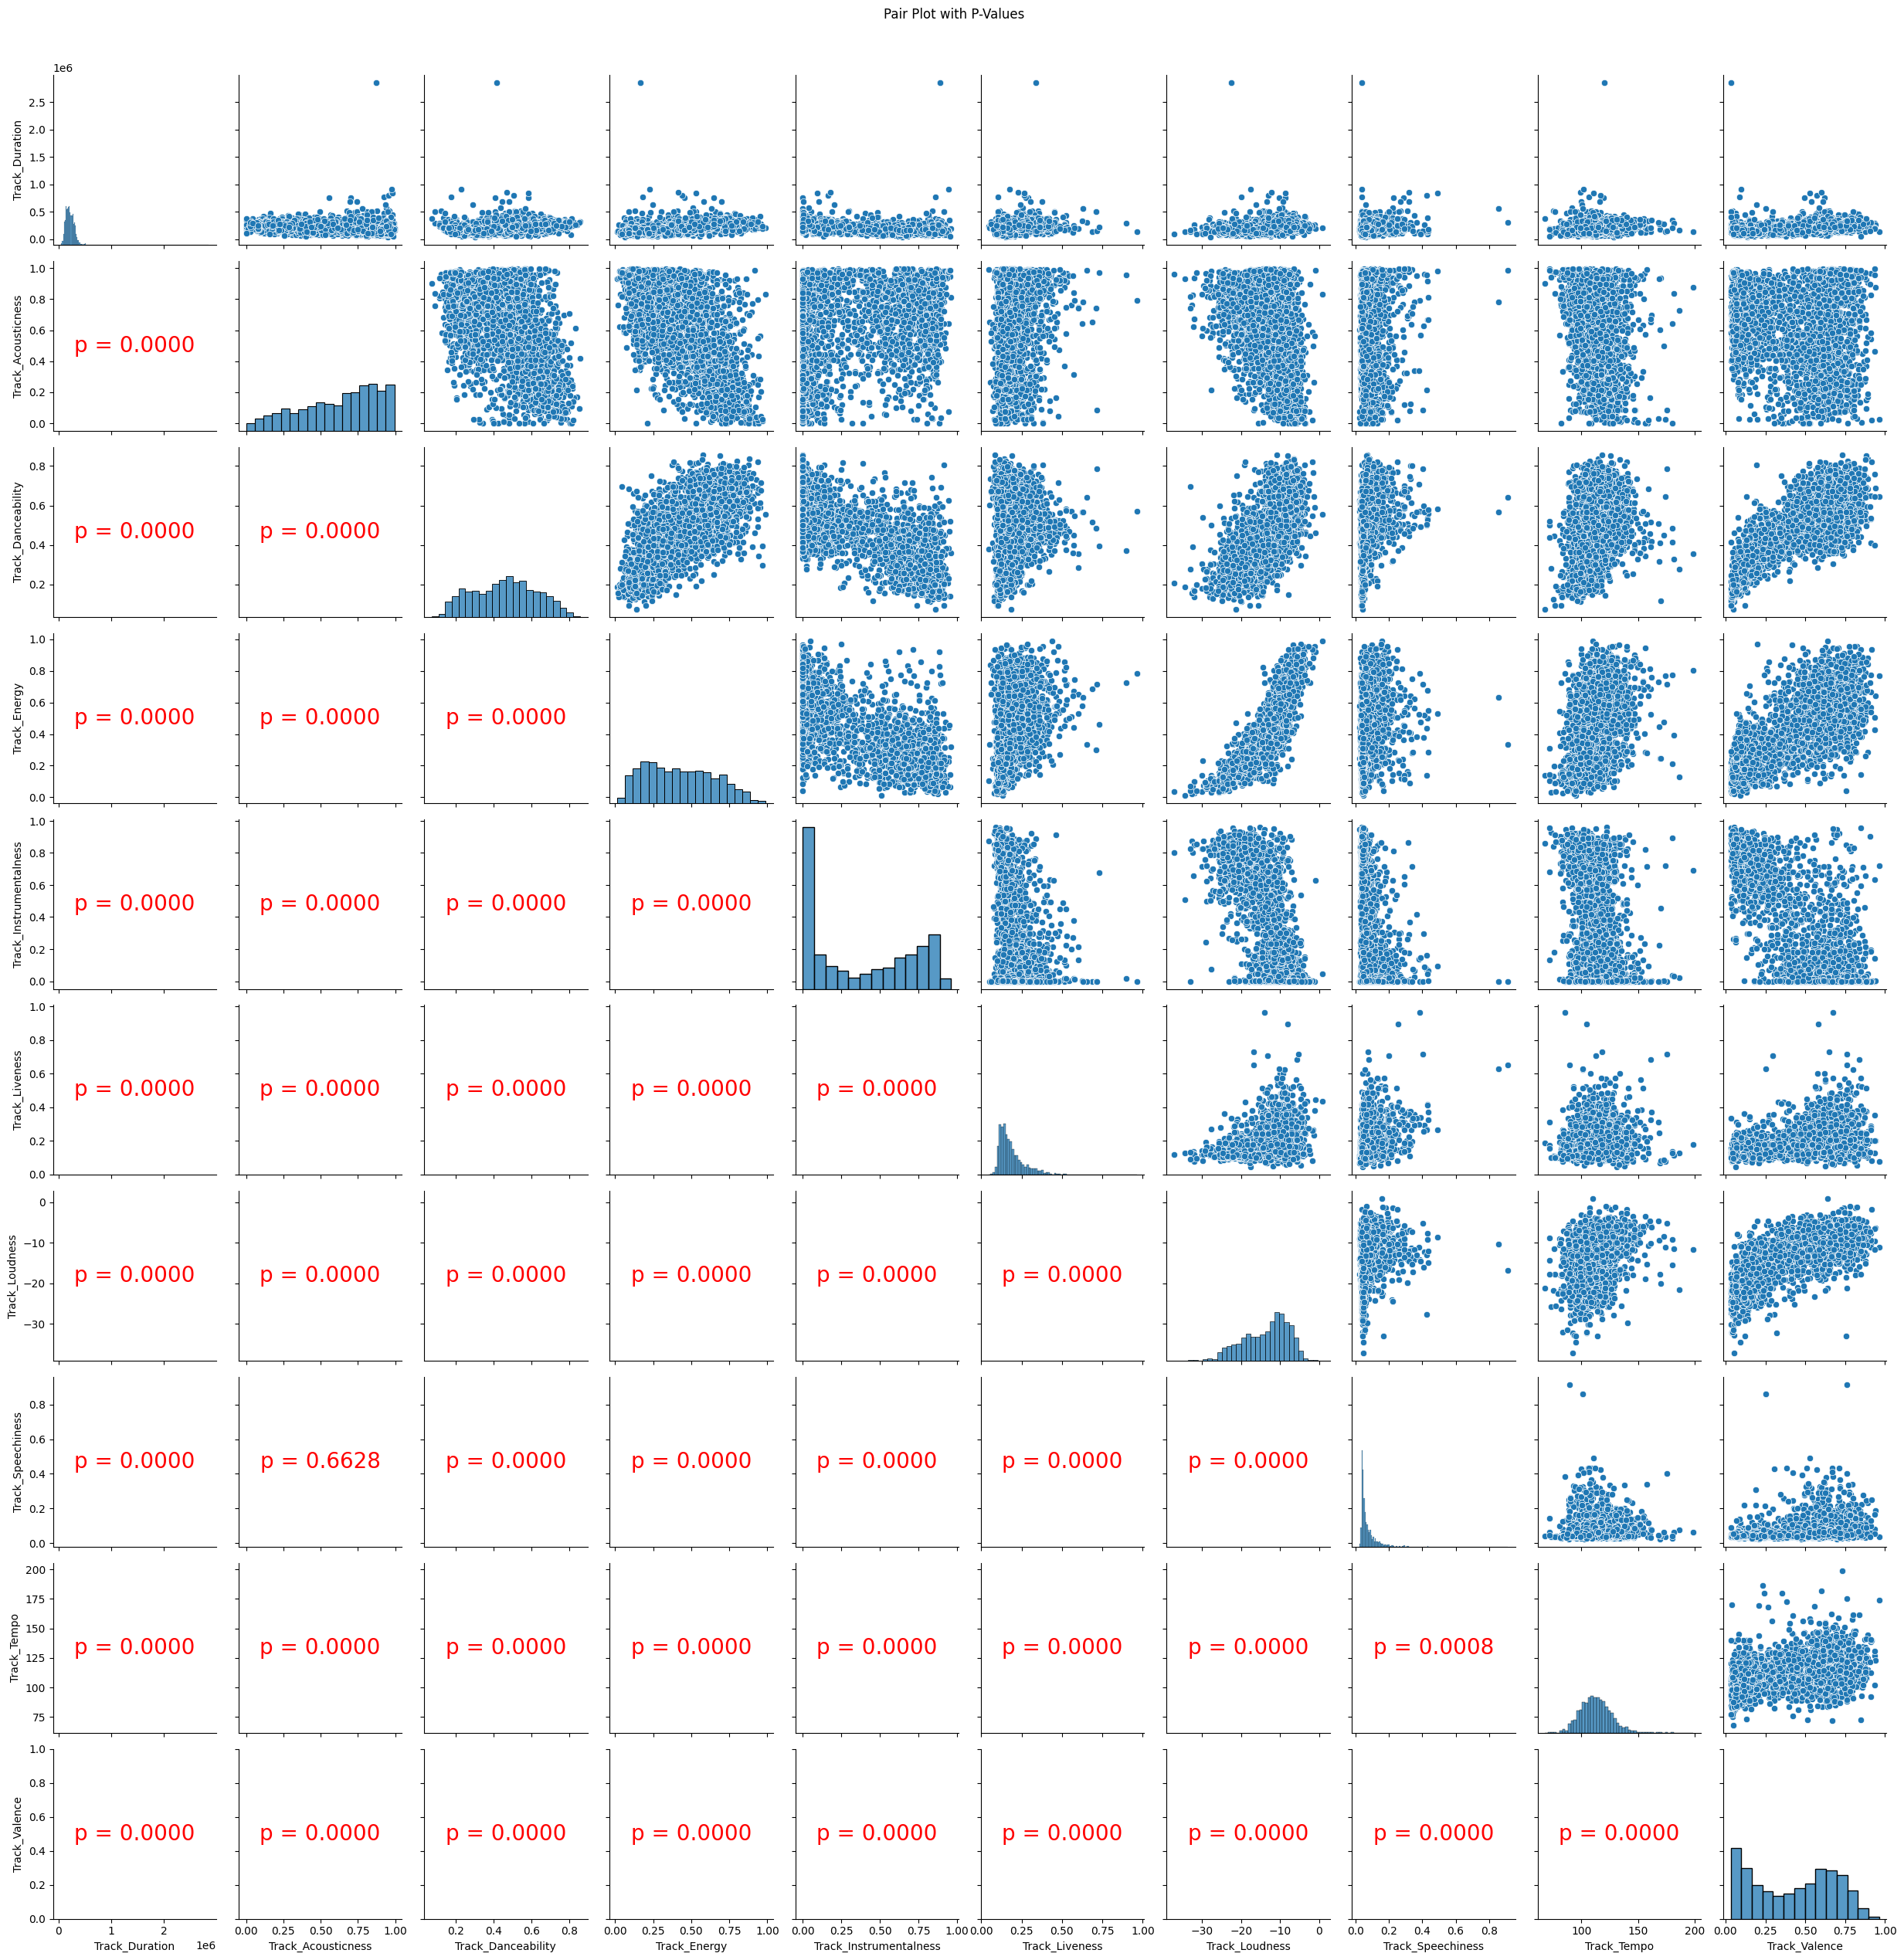

In [36]:
plot_helpers.pair_grid_w_p_values(sample_movie_music_df_avg_by_movie[['Track_Duration', 'Track_Acousticness', 'Track_Danceability',
                    'Track_Energy', 'Track_Instrumentalness', 'Track_Liveness',
                    'Track_Loudness', 'Track_Speechiness', 'Track_Tempo', 'Track_Valence']])

The pairplot above shows the data distributions of two variables (pairwise) with their respecting p-values. Recall that a p-value less than 0.05 is often considered statistically significant suggesting that there is evidence to reject the null hypothesis that there is no correlation between the variables. 

Now lets focus on our pairplot of music attributes: 

Except from one subplot, where we observe a p-value of 0.66 (>0.05) and thus cannot reject the null hypothesis that there is a statistically significant correlation between those two variables, we observe a p-value of 0.0000 (one case is 0.0008) everywhere else. This doesn't mean the p-value is exactly zero but it is a very small value rounded to zero for display and in practice. This is still considered highly statistically significant and indicates strong evidence against the null hypothesis and thus, indicates highly significant correlation.

# Next Steps: Merging MovieLens Metadata Dataset to fill in missing values 

Seeing the large number of missing values in the Movie_Release_Date (= 8% approx.), Movie_Box_Office_Revenue (= 90% approx.)and Movie_Runtime (= 25% approx.) in the movie_metadata dataset, merging it with another dataset to potentially fill in the missing values makes sense. Thus we will use the file MovieLens_metadata.csv file available on Kaggle (https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset) which contains metadata for more than 45000 movies whose release date was on or before July 2017. 

# Next Steps: Adding Additional Columns to our Dataset for Success Analysis

As our final goal is to analyse the success of a movie w.r.t its music, we want to add to our dataset some more attributes about a movie's success. In IMDb datasets, we found a dataset about the ratings of the movies: They display in one column ('averageRating') the weighted average of all the individual user ratings, and in another column ('numVotes') the number of votes a title has received. With those two columns we hope to be able to identify if a movie was a success or not and define our notion of success. 